# TCCM school - Multiscale, Machine Learning and QSAR methods applied to biomolecules

## Introduction to Deep Learning, Tensorflow/Keras and Convolutional neural network

### Sergio Orlandini - s.orlandini@cineca.it

*21-09-2022*

https://github.com/so07/TCCM-DL-2022

```
git clone https://github.com/so07/TCCM-DL-2022.git
```

# Classification problems with Keras

Classification is the task of recognize some items from a set of candidate targets.
This is a very common task for Deep Learning technique,
which is very well performed for example with **image recogniction**.
An image recognition problem is a classification problem which takes as input some images.

# MNIST classification problem

In this task we have to classify grayscale images of handwritten digits (28 pixels by 28 pixels) into their 10 categories from 0 to 9.

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/)
is a classic dataset in the machine learning community. 
The dataset is a standard set of handwritten numerical digits from 0 to 9
which is commonly used as the "Hello World" test for Deep Learning classification problem.
It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.
The entire images contain 28 pixels across and 28 pixels down, for a total of 784 pixels.

`Keras` comes with many dataset built in and
automatically splits the dataset into a training and validation set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Train dataset has shape", train_images.shape, "and type", train_images.dtype)

Train dataset has shape (60000, 28, 28) and type uint8


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
num_samples = 30000
train_images = train_images[:num_samples,...]
train_labels = train_labels[:num_samples]

In [6]:
print("Test dataset has shape", test_images.shape, "and type", test_images.dtype)

Test dataset has shape (10000, 28, 28) and type uint8


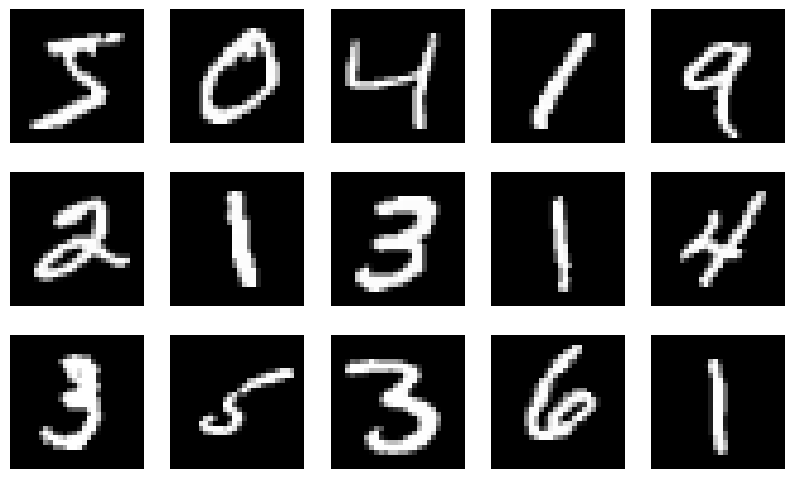

In [7]:
fig = plt.figure(figsize=(10, 6))
rows, cols = 3, 5
for n in range(rows * cols):
    plt.subplot(rows, cols, n+1)
    plt.imshow(train_images[n], cmap='gray')
    plt.axis('off')

In [8]:
train_images[0][4:12,5:12]

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  30,  36,  94, 154],
       [  0,   0,  49, 238, 253, 253, 253],
       [  0,   0,  18, 219, 253, 253, 253],
       [  0,   0,   0,  80, 156, 107, 253],
       [  0,   0,   0,   0,  14,   1, 154],
       [  0,   0,   0,   0,   0,   0, 139]], dtype=uint8)

In [9]:
import pandas as pd

img = train_images[5]

df = pd.DataFrame(img[4:15,5:24])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,13,25,100,122,7,0,0,0,0
2,0,0,0,0,0,0,0,0,33,151,208,252,252,252,146,0,0,0,0
3,0,0,0,0,0,0,40,152,244,252,253,224,211,252,232,40,0,0,0
4,0,0,0,0,15,152,239,252,252,252,216,31,37,252,252,60,0,0,0
5,0,0,0,0,96,252,252,252,252,217,29,0,37,252,252,60,0,0,0
6,0,0,0,0,181,252,252,220,167,30,0,0,77,252,252,60,0,0,0
7,0,0,0,0,26,128,58,22,0,0,0,0,100,252,252,60,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,157,252,252,60,0,0,0
9,0,0,0,0,0,0,0,0,110,121,122,121,202,252,194,3,0,0,0


In [10]:
train_labels

array([5, 0, 4, ..., 6, 7, 1], dtype=uint8)

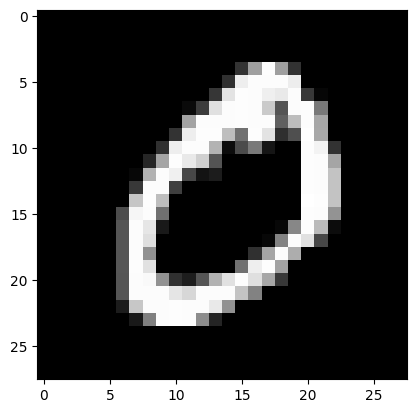

In [11]:
plt.imshow(train_images[1], cmap='gray');

In [12]:
train_labels.shape

(30000,)

In [13]:
threes = np.array([image for image, label in zip(train_images, train_labels) if label == 3])

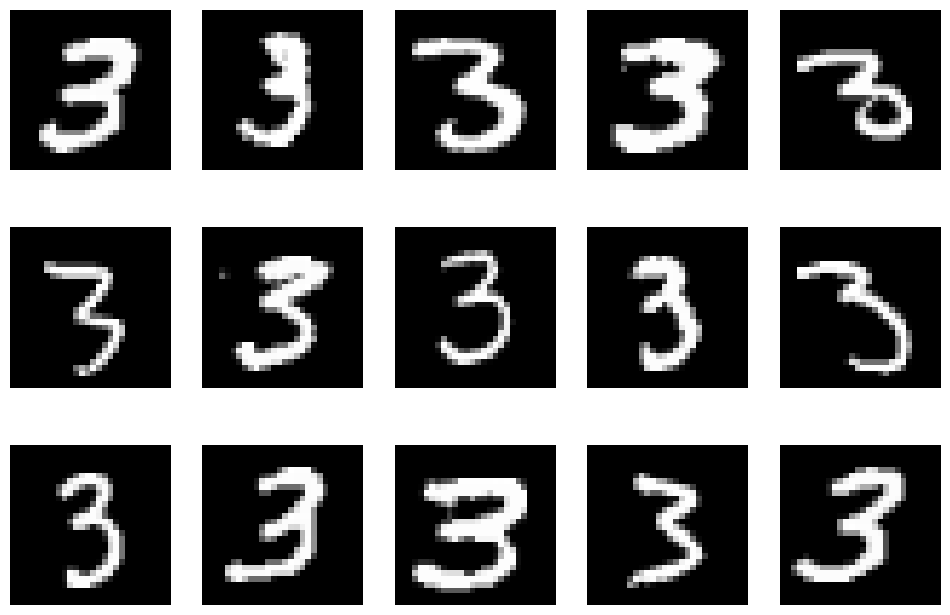

In [14]:
fig = plt.figure(figsize=(12, 8))
rows, cols = 3, 5
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(threes[i], cmap='gray')
    plt.axis("off")

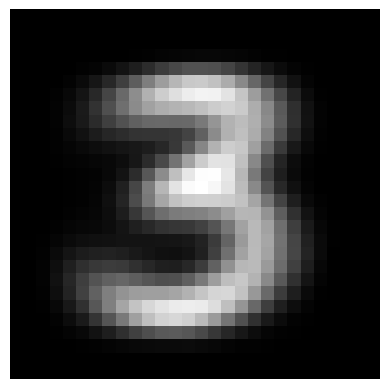

In [15]:
plt.imshow(threes.mean(0), cmap='gray')
plt.axis("off");

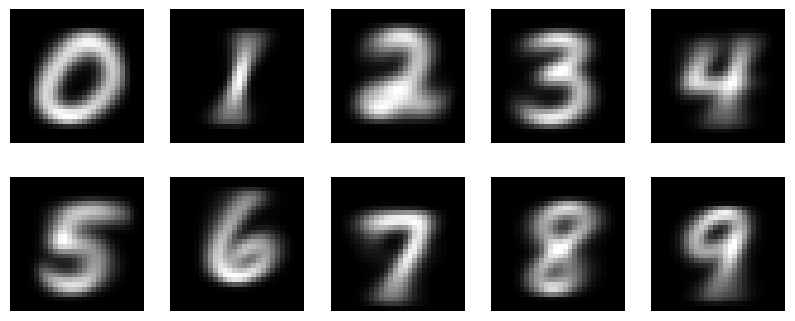

In [16]:
means = []
for i in range(10):
    imgs = np.array([n for l, n in zip(train_labels, train_images) if l == i])
    imgs = imgs.astype("float") / 255.
    means.append(imgs.mean(0))

fig = plt.figure(figsize=(10, 4))
rows, cols = 2, 5
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(means[i], cmap='gray')
    plt.axis("off")

## Prepare dataset

The images in MNIST dataset are stored as array of integer with value between 0 and 255. \
Neural network layers work on float, thus we need to cast the input to `float32` type. \
It is also convenient, for convergency reasons, to normalize the input range values between [0, 1].

In [17]:
# 1D data
x_train = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2])
x_test = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2])

In [18]:
# normalize images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [19]:
print("train: shape", x_train.shape, "and type", x_train.dtype)
print("test: shape", x_test.shape, "and type", x_test.dtype)

train: shape (30000, 784) and type float32
test: shape (10000, 784) and type float32


### Build categorical matrices

In the case of labels we have an array 1D with the value of the label.
Instead we should represent labels as categorical matrix,
for each images we should have an array of 10 different classes with the probability for each classes. \
In the case of target for each images
we have an array of 10 elements with 1 on the right label and 0 otherwise.


In [20]:
train_labels

array([5, 0, 4, ..., 6, 7, 1], dtype=uint8)

In [21]:
import tensorflow.keras.utils as np_utils

# convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(train_labels, num_classes=10)
y_test = np_utils.to_categorical(test_labels, num_classes=10)

In [22]:
print(train_labels[:3])

y_train[:3]

[5 0 4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Build model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(256, input_shape=(28 * 28, ), activation="relu"))

# the final layer which has an output size of num classes
# corresponding to the size of our category items to match
model.add(Dense(10, activation="softmax"))

In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

## Digression on Categorical Cross-entropy

The ***categorical cross-entropy*** is the expectation value of $− \log \textbf q$
where $\textbf q$ is and estimated distribution (i.e measured) and $\textbf p$ is the true distribution

$$
H({\bf{p}},{\bf q})=E_{\textbf{p}} [-\log {\textbf q}] 
$$

for discrete distribution $\textbf p$ and $\textbf q$ with the same support A

$$
H({\bf{p}},{\bf q})=-\sum_{A}{{\bf p(x)}\log{\bf q(x)}} 
$$

If we have 3 classes : $cats$, $dogs$, $horses$. <br>
The true labels associated with the three classes are for example:<br>

$$
\begin{align}
& {\bf P}(cat)   &= [1, \; 0, \; 0] \\
& {\bf P}(dog)   &= [0, \; 1, \; 0] \\
& {\bf P}(horse) &= [0, \; 0, \; 1] 
\end{align}
$$

If we expect a $cat$ but we predict
$${\bf Q} = [0.1, \; 0.6, \; 0.5]$$
The loss value of categorical cross-entropy function is
$$-1/3 \cdot (1 \cdot \log0.1 + 0 \cdot \log 0.6 + 0 \cdot \log 0.5) = -1/3 \cdot \log 0.1 \sim 0.76$$
If after training we have for $cat$
$${\bf Q} = [0.8, \; 0.1, \; 0.1]$$
then
$$-1/3 \cdot (1 \cdot \log 0.8 + 0 \cdot \log 0.1 + 0 \cdot \log 0.1) = -1/3 \cdot \log 0.8 \sim 0.074 $$
much less than the previous value

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=20,
          validation_split=0.2,
          verbose=1);

Epoch 1/20
188/188 [==============================] - 2s 5ms/step - loss: 0.4457 - accuracy: 0.8785 - val_loss: 0.2696 - val_accuracy: 0.9238
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2034 - accuracy: 0.9422 - val_loss: 0.2075 - val_accuracy: 0.9420
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.1470 - accuracy: 0.9580 - val_loss: 0.1609 - val_accuracy: 0.9548
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9696 - val_loss: 0.1470 - val_accuracy: 0.9568
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9770 - val_loss: 0.1346 - val_accuracy: 0.9605
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.1212 - val_accuracy: 0.9663
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9860 - val_loss: 0.1198 - val_accuracy: 0.9648
Epoch 

In [27]:
def plot_model_history(model):
    
    # get history from the model
    h = model.history.history

    plt.figure(figsize=(15, 5))

    # accuracy plot
    plt.subplot(121)
    plt.title("Accuracy")
    plt.plot(h['accuracy'], label="train")
    plt.plot(h['val_accuracy'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()

    # loss plot
    plt.subplot(122)
    plt.title("Loss")
    plt.plot(h['loss'], label="train")
    plt.plot(h['val_loss'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend()

    plt.show()

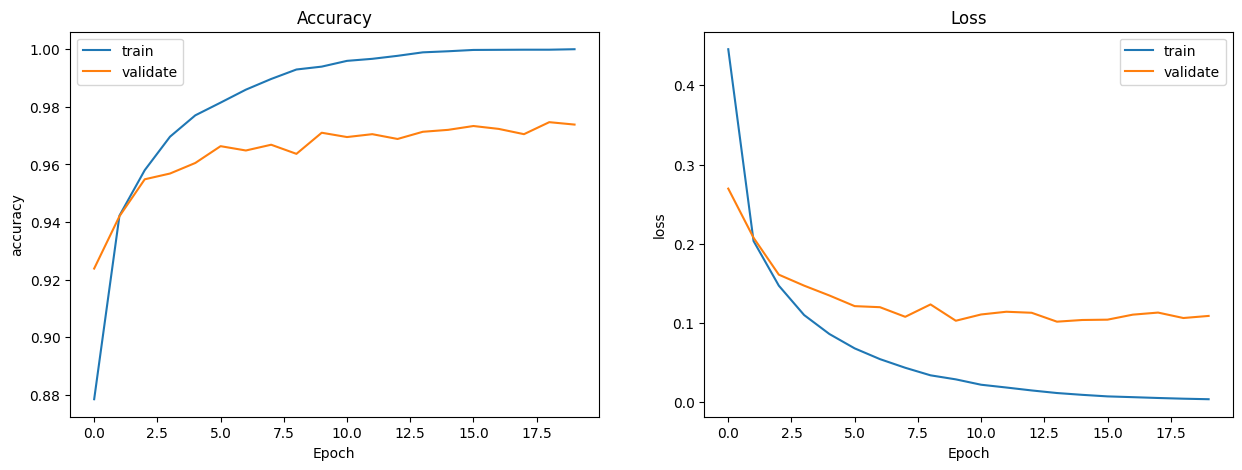

In [28]:
plot_model_history(model)

Once your model has been trained, let's evaluate its score on data not used during traing. \
The `evaluate` method returns a list of two element:
the first is the **loss**, the second is the metrics values for the model, in this case the **accuracy**.

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.58%


In [30]:
model = Sequential()

model.add(Dense(16, input_shape=(28 * 28, ), activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=20,
          validation_split=0.2,
          verbose=1);

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.9559 - accuracy: 0.7464 - val_loss: 0.4867 - val_accuracy: 0.8740
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8953 - val_loss: 0.3686 - val_accuracy: 0.8968
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3250 - accuracy: 0.9112 - val_loss: 0.3297 - val_accuracy: 0.9085
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.9190 - val_loss: 0.3128 - val_accuracy: 0.9103
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.9230 - val_loss: 0.2946 - val_accuracy: 0.9180
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2608 - accuracy: 0.9269 - val_loss: 0.2859 - val_accuracy: 0.9208
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.2490 - accuracy: 0.9310 - val_loss: 0.2787 - val_accuracy: 0.9217
Epoch 

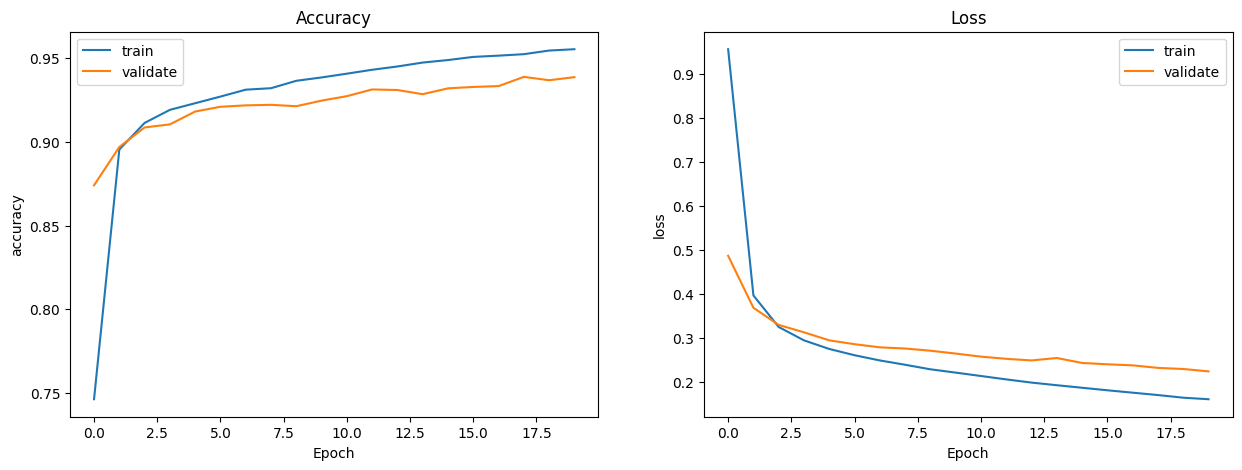

In [32]:
plot_model_history(model)

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 93.81%


# Convolutional Neural Network (CNNs)

<img src="figures/cnn.png" width="80%">

We cannot simply unroll **2D image** data into a 1D array of input,
because spatial structure of the images is very important, information is in the structure of the data.

Convolutional neural networks are biologically inspired variants of multilayer perceptrons, designed to emulate the behaviour of a visual cortex. CNNs are multi-layered feed-forward neural networks that are able to learn task-specific **invariant features** in a hierarchical manner. These models mitigate the challenges posed by the classic Multi-Layer Perceptron (MLP) architecture by exploiting the strong spatially local correlation present in natural images.

Convolutional neural networks (CNNs) use three basic ideas:
- local receptive fields
- shared weights and biases
- pooling.


## Local Receptive Fields

In a convolutional neural network there is no need to connect every input pixel to every hidden neuron.
Instead it is more convenient to make connection between small and localized regions of the input image.
Each neuron of the first hidden layer is connected with a small region of the input image,
for example the 5x5 tile with 25 pixels of the following picture

<img src="figures/convolution-stencil.png" width="40%">

The region in input image is called the local receptive field for hidden neuron.
Each connection learns a weight and a bias.
Thus each hidden neuron analyze its given local receptive field. \
The local receptive field is slided for entire image.
Therefor for each local receptive field there is a dedicated hidden neuron.

<img src="figures/convolution-stencil-sliding.png" width=40%>

This means that for a staring input image of 28x28 pixel, like ones in MNIST dataset,
and using a receptive field of size 5x5, 24x24 hidden neurons are needed.


## Shared weights-biases

Each hidden neuron shares the same weight and bias.
This means that all neurons in the first hidden layer detect the same feature in a different position in the image.
Think of the feature detected by a hidden neuron as the kind of input pattern that will cause the neuron to activate: it might be an edge in the image, for instance, or maybe some other type of shape, just at different locations in the input image.
In this way the convolutional networks are well adapted to the translation invariance of images.

The connection between input image and hidden layer is called a *feature map* and
shared weights and biases define a *kernel* or a *filter*.

In general a convolutional layer is composed by more than one feature map.
If the convolutional layer has 3 different layers, with 3 different set of weights and biases,
then 3 different features are mapped.

<img src="figures/convolution-features.png" width=50%>


The use of shared weights and biases strongly reduces the number of parameters in neural networks.
Using a 5x5 filter we need 5x5=25 weights plus a single bias for each feature map.
In the case of 20 filters 20x26=520 parameters are needed for convolutional layer. \
Nevertheless, if a dense layer of 20 hidden neurons is fully connected with an input image of 28x28=784 pixels
we need 20x784=15680 weights plus 20 biases for a total of 15700 parameters.


## Prepare dataset

When dealing with images as input,
we must preprocess input training data in the manner the Keras backend describe an image.
Images can be described in the following two ways:
- **channel_first**: (channels, width, height) aka **NCHW**
- **channel_last**: (width, height, channels) aka **NHWC**

The MNIST input images have a depth of 1, so channels is 1 because they are simple greyscale images.

In [34]:
from tensorflow.keras import backend

print("Image type:", backend.image_data_format())

# input image dimensions
img_rows, img_cols = 28, 28
if backend.image_data_format() == 'channels_first':
    x_train = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    x_test = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    backend.set_image_data_format('channels_first')
else:
    x_train = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    x_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    backend.set_image_data_format('channels_last') # useless. default in tensorflow

Image type: channels_last


In [35]:
# normalize images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

## Convolutional layers in Keras

Keras provides **Conv{*N*}D** layer objects for convolution,
where *N* is the number of dimension of the features for each input (1D, 2D, 3D). 

Important parameters are:
- `filters`: number of output filters (features to catch)
- `kernel_size`: size of the convolution window
- `strides`: define window shifting step (default 1)
- `padding`: One of "*valid*" or "*same*" (case-insensitive)
  - *valid*: no padding, stop at last valid element in window
  - *same*: use padding (default)

In [36]:
from tensorflow.keras.layers import Conv2D, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

model.add(Flatten()) # transform 2D output into a 1D to feed the Dense layer

# ... and the final layer which has an output size of nb_classes
# corresponding to the size of our category items to match
model.add(Dense(10, activation="softmax"))

In [37]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                216330    
                                                                 
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train, y_train, 
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          verbose=1);

Epoch 1/10
  1/188 [..............................] - ETA: 3:54 - loss: 2.2976 - accuracy: 0.1406

2022-09-21 15:22:11.949865: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


188/188 [==============================] - 2s 5ms/step - loss: 0.4038 - accuracy: 0.8901 - val_loss: 0.2259 - val_accuracy: 0.9333
Epoch 2/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1571 - accuracy: 0.9560 - val_loss: 0.1373 - val_accuracy: 0.9610
Epoch 3/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9721 - val_loss: 0.1133 - val_accuracy: 0.9695
Epoch 4/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9801 - val_loss: 0.0982 - val_accuracy: 0.9743
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9865 - val_loss: 0.0946 - val_accuracy: 0.9743
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9892 - val_loss: 0.0938 - val_accuracy: 0.9745
Epoch 7/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9918 - val_loss: 0.0917 - val_accuracy: 0.9740
Epoch 8/10
188/18

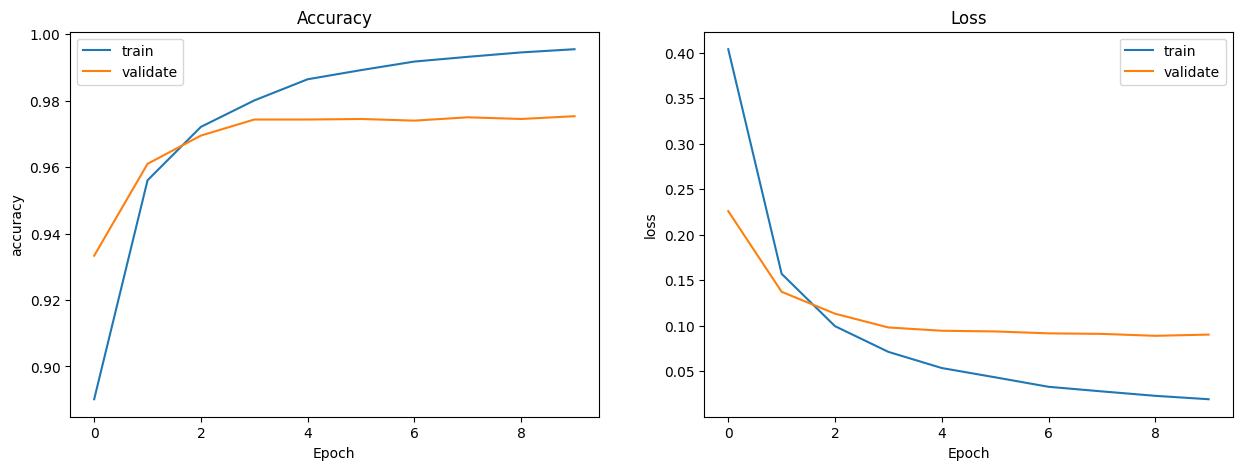

In [39]:
plot_model_history(model)

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.74%


### Pooling Layers

Pooling is used in convolutional neural networks to make the detection of certain features invariant to scale and orientation changes. Pooling generalise over lower level, more complex information.

Pooling layers are usually used immediately after convolutional layers. 

Kesar provides **Pooling2D** layer objects for this purpose. Important parameters are:
- `pool_size`: size of the max pooling windows.
- `strides`: downscaling factor. If None, it will default to pool_size.
- `padding`: One of "*valid*" or "*same*" (case-insensitive).
  - *valid*: valid: no padding, stop at last valid element in window
  - *same*: use padding (default)
  
For example, a max-pooling layer with `pool_size=(2,2)` and `stride=None` will reduce an input 81x81 to an 41x41 output.
Using `padding='valid'` will reduce output to 40x40, because no extra padding will be applied on original input shape.

<img src="figures/Max-pooling.jpg" width=400pt>

In [41]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # transform 2D output into a 1D to feed the Dense layer

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=10,
          validation_split=0.2,
          verbose=1);

Epoch 1/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5659 - accuracy: 0.8533 - val_loss: 0.2733 - val_accuracy: 0.9252
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2214 - accuracy: 0.9370 - val_loss: 0.1974 - val_accuracy: 0.9428
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1519 - accuracy: 0.9577 - val_loss: 0.1447 - val_accuracy: 0.9620
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.9696 - val_loss: 0.1207 - val_accuracy: 0.9682
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.9755 - val_loss: 0.1027 - val_accuracy: 0.9728
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9798 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 7/10
188/188 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9818 - val_loss: 0.0893 - val_accuracy: 0.9750
Epoch 

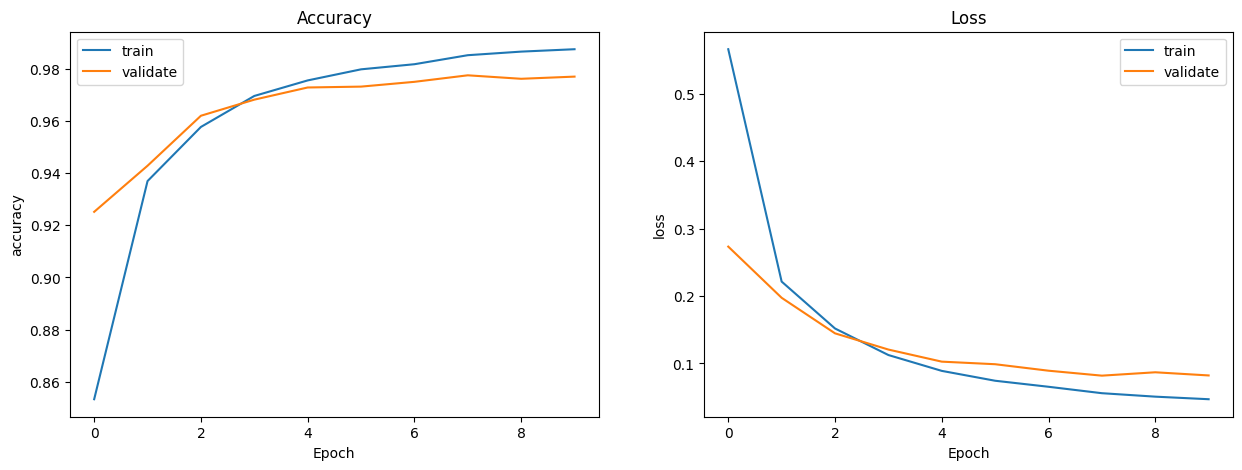

In [43]:
plot_model_history(model)

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.69%


### Dropout Layers

Recently the pooling approach has been often substituted or combined with a dropout.
The drop out layer acts during training only.
It simply turn off random fraction of input into the layer below, which helps prevent overfitting.

Kesar provides **layers.Dropout** layer objects for this purpose.
Important parameters are:
- `rate`: fraction of input unit to drop.
- `noise_shape`: shape of the binary dropout mask.
- `seed`: for random initialization.

<img src="figures/dropout.gif" width=500pt>

In [45]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5)) # Dropout 50%

model.add(Flatten()) # transform 2D output into a 1D to feed the Dense layer

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [46]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=10,
          validation_split=0.2,
          verbose=1);

Epoch 1/10
188/188 [==============================] - 1s 4ms/step - loss: 0.6054 - accuracy: 0.8380 - val_loss: 0.2789 - val_accuracy: 0.9217
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2527 - accuracy: 0.9270 - val_loss: 0.2039 - val_accuracy: 0.9377
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1854 - accuracy: 0.9466 - val_loss: 0.1531 - val_accuracy: 0.9577
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1511 - accuracy: 0.9575 - val_loss: 0.1362 - val_accuracy: 0.9645
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1319 - accuracy: 0.9621 - val_loss: 0.1147 - val_accuracy: 0.9672
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1162 - accuracy: 0.9658 - val_loss: 0.1049 - val_accuracy: 0.9715
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.1000 - val_accuracy: 0.9747
Epoch 

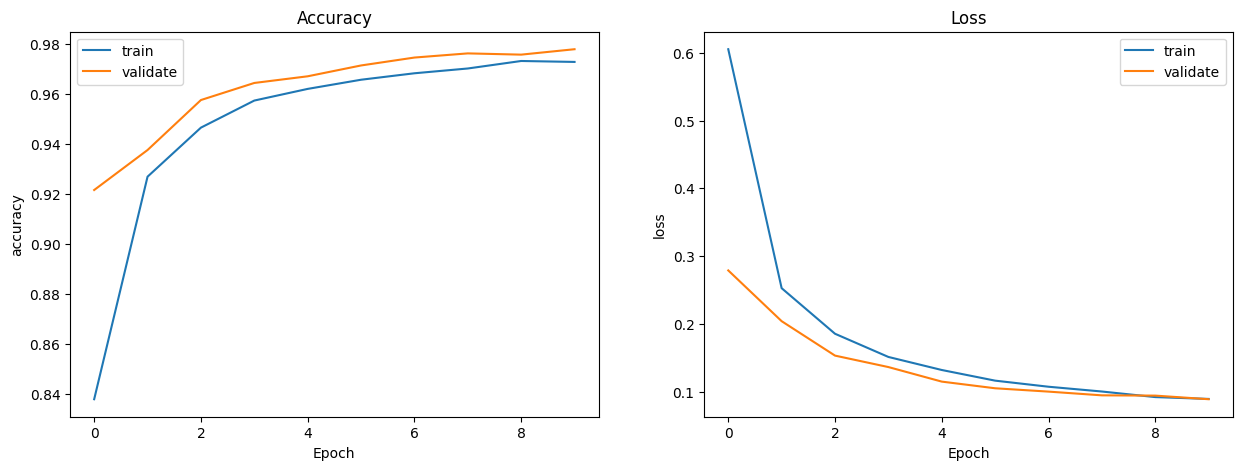

In [47]:
plot_model_history(model)

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 97.72%


In [49]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # transform 2D output into a 1D to feed the Dense layer

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1179776   
                                                      

# LeNet-5

LeNet was one of the earliest convolutional neural network developed by Yann LeCun *et al.* \
LeCun *et al.* Neural Computation, 1, 541-551 (1989).

LeNet-5 consists of 7 layers, not counting the input layer.
It is developed by 2 subgroups of a Convolutional layer with a kernel size of 5x5
followed by a pooling layer of size 2x2, then there are 2 Dense layers with 120 and 84 nodes respectively.
Finally a softmax layer to 10 categories.

<img src="figures/LeNet.png" width=600pt>

In [50]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation="relu", input_shape=input_shape))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model.add(AveragePooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(units=120, activation="relu"))

model.add(Dense(units=84, activation="relu"))

model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [51]:
model.fit(x_train, y_train, 
          batch_size=128,
          epochs=10,
          validation_split=0.2,
          verbose=1);

Epoch 1/10
188/188 [==============================] - 2s 6ms/step - loss: 0.6278 - accuracy: 0.8214 - val_loss: 0.2860 - val_accuracy: 0.9157
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9335 - val_loss: 0.1929 - val_accuracy: 0.9398
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1436 - accuracy: 0.9556 - val_loss: 0.1323 - val_accuracy: 0.9612
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.9678 - val_loss: 0.1451 - val_accuracy: 0.9585
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0842 - accuracy: 0.9733 - val_loss: 0.1150 - val_accuracy: 0.9637
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.0905 - val_accuracy: 0.9728
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0902 - val_accuracy: 0.9722
Epoch 

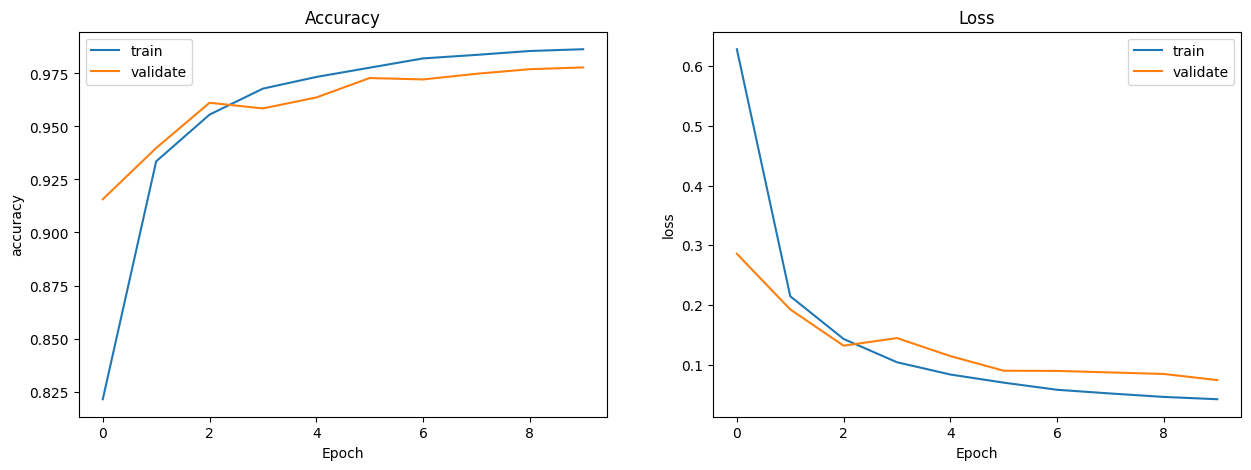

In [52]:
plot_model_history(model)

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 98.11%


In [54]:
def plot_digit_and_probability(image, matrix_probs, text):

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("prob. {}".format(text))
    plt.imshow(image, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("probability for each digit class")
    plt.bar(np.arange(10), matrix_probs.reshape(10), align="center")
    plt.xticks(np.arange(10), np.arange(10).astype(str))
    

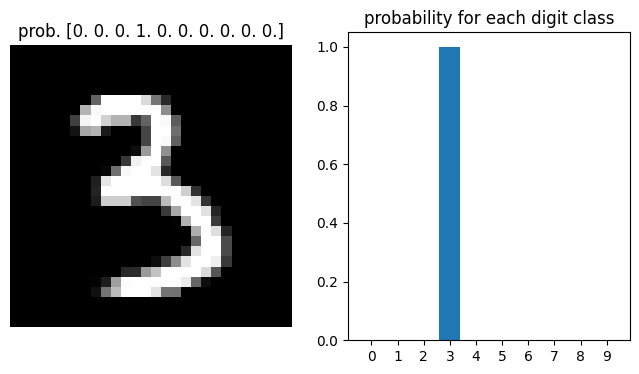

In [55]:
i = 32
digit = x_test[i].reshape(28, 28)

#probs = model.predict_proba(digit.reshape(1, 28, 28, 1), batch_size=1) # TensorFlow < 2.5
probs = model.predict(digit.reshape(1, 28, 28, 1), batch_size=1)

plot_digit_and_probability(digit, probs, y_test[i])

In [56]:
#predictions = model.predict_classes(x_test, verbose=0) # TensorFlow < 2.5

predict_x = model.predict(x_test) 
predictions = np.argmax(predict_x, axis=1)

# for each predicted result select those which are not correct
wrong_results = np.where(test_labels!=predictions)[0]

print("There are ", len(wrong_results), "wrong predictions over", len(predictions))

There are  189 wrong predictions over 10000


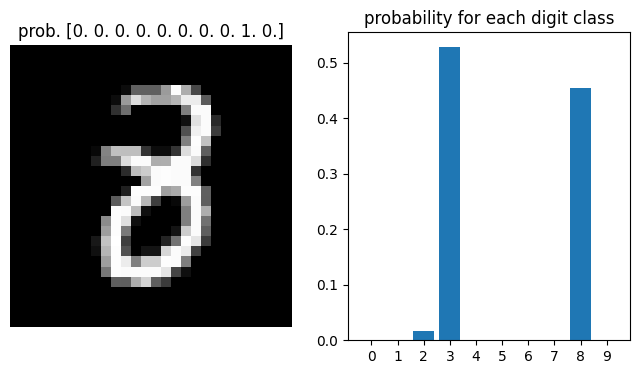

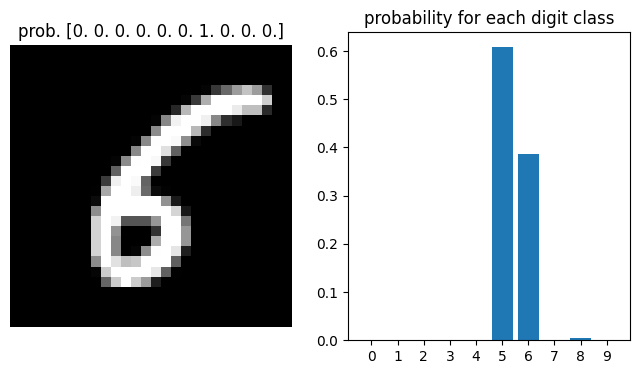

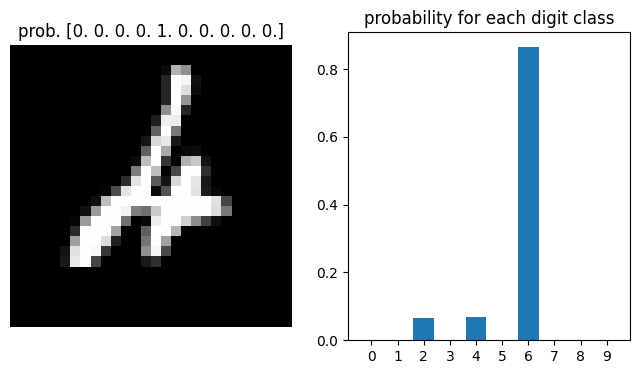

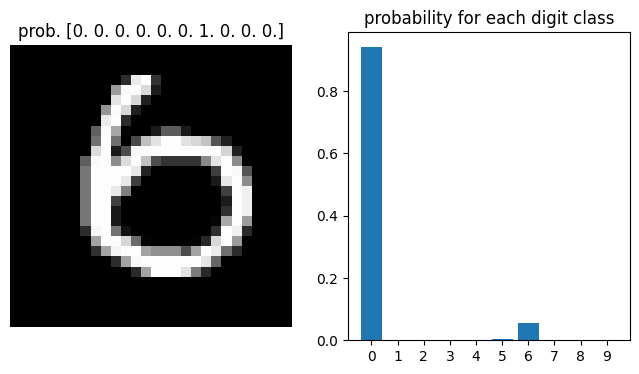

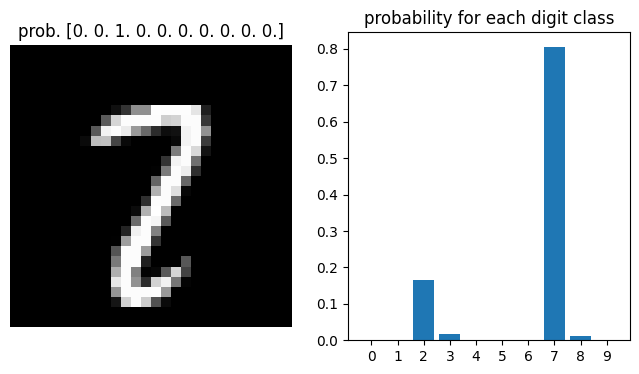

In [57]:
for i in wrong_results[:5]:
    digit = x_test[i].reshape(28,28)
    #probs = model.predict_proba(digit.reshape(1,28,28,1), batch_size=1) # TensorFlow < 2.5
    probs = model.predict(digit.reshape(1, 28, 28, 1), batch_size=1)
    plot_digit_and_probability(digit, probs, y_test[i])

In [58]:
layer = backend.function([model.layers[0].input], [model.layers[0].output])
l = layer([x_test])[0]
l.shape

(10000, 24, 24, 6)

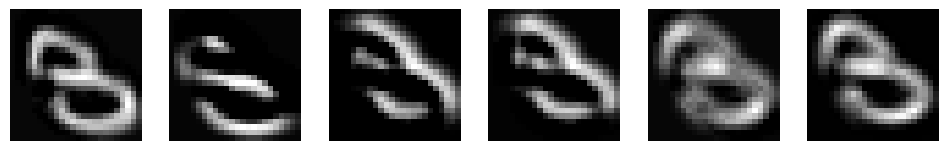

In [59]:
# visualize output of each convolution filter for a selected item
def visualize_convolution_output(index):
    plt.figure(figsize=(12,12))

    for n in range(6): # loop over layers
        plt.subplot(6,6,n+1); 
        plt.imshow(l[index,:,:,n], cmap='gray')
        plt.axis('off')

# select one item (index) from the dataset
item = 18
visualize_convolution_output(item)

In [60]:
from sklearn.metrics import confusion_matrix

#y_pred = model.predict_classes(x_test) # TensorFlow < 2.5

y_pred = np.argmax(model.predict(x_test), axis=1)

y_true = np.argmax(y_test, axis=1) 

cm = confusion_matrix(y_true, y_pred)

In [61]:
cm

array([[ 970,    0,    0,    0,    1,    2,    2,    1,    3,    1],
       [   0, 1120,    3,    1,    2,    1,    5,    2,    1,    0],
       [   1,    0, 1024,    0,    2,    1,    0,    3,    1,    0],
       [   0,    0,    3,  990,    0,   10,    0,    2,    2,    3],
       [   0,    0,    0,    1,  972,    0,    5,    0,    0,    4],
       [   0,    0,    0,    6,    0,  883,    1,    1,    0,    1],
       [   5,    2,    0,    0,    5,   13,  931,    0,    2,    0],
       [   1,    1,   18,    1,    1,    0,    0,  997,    1,    8],
       [   3,    0,    5,    4,    3,   10,    2,    3,  941,    3],
       [   2,    3,    0,    2,   11,    2,    0,    5,    1,  983]])

In [62]:
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(8, 8))
    
    plt.xticks(range(len(classes)))
    plt.yticks(range(len(classes)))
    
    plt.imshow(cm, cmap=cmap)
    
    # value in cells
    for i in classes:
        for j in classes:
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > cm.max()*0.5 else "black")

    plt.colorbar()
    plt.title(title)
    plt.xlabel('Predicted class')
    plt.ylabel('Real class')
    plt.grid(False)

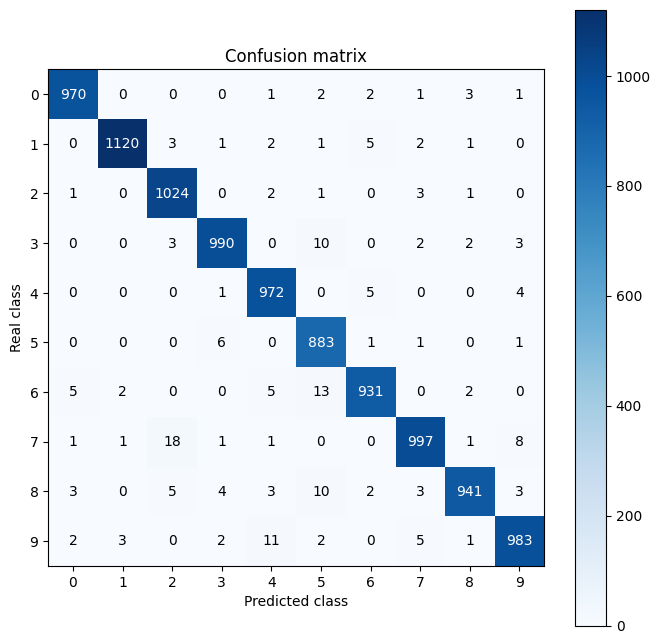

In [63]:
plot_confusion_matrix(cm, classes=range(10))

In [64]:
np.diagonal(cm).sum() / cm.sum()

0.9811

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD

def VGG():
    
    model = Sequential()
    
    model.add(Convolution2D(64, (3, 3), activation="relu", padding="same", input_shape=input_shape))
    #model.add(Convolution2D(64, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Convolution2D(128, (3, 3), activation="relu", padding="same"))
    #model.add(Convolution2D(128, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Convolution2D(256, (3, 3), activation='relu', padding="same"))
    #model.add(Convolution2D(256, (3, 3), activation='relu', padding="same"))
    #model.add(Convolution2D(256, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    #model.add(Convolution2D(512, (3, 3), activation="relu", padding="same"))
    #model.add(Convolution2D(512, (3, 3), activation="relu", padding="same"))
    #model.add(Convolution2D(512, (3, 3), activation="relu", padding="same"))
    #model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

simple_vgg = VGG()

simple_vgg.compile(#optimizer=SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True),
                   optimizer="adam",          
                   loss='categorical_crossentropy',
                   metrics=["accuracy"])

simple_vgg.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 256)       

In [66]:
simple_vgg.fit(x_train, y_train, 
               batch_size=128, 
               epochs=5,
               validation_split=0.2,
               verbose=1);

Epoch 1/5
188/188 [==============================] - 2s 8ms/step - loss: 0.3182 - accuracy: 0.8970 - val_loss: 0.0793 - val_accuracy: 0.9745
Epoch 2/5
188/188 [==============================] - 1s 6ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.0523 - val_accuracy: 0.9847
Epoch 3/5
188/188 [==============================] - 1s 6ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0494 - val_accuracy: 0.9835
Epoch 4/5
188/188 [==============================] - 1s 6ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 5/5
188/188 [==============================] - 1s 6ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0379 - val_accuracy: 0.9885


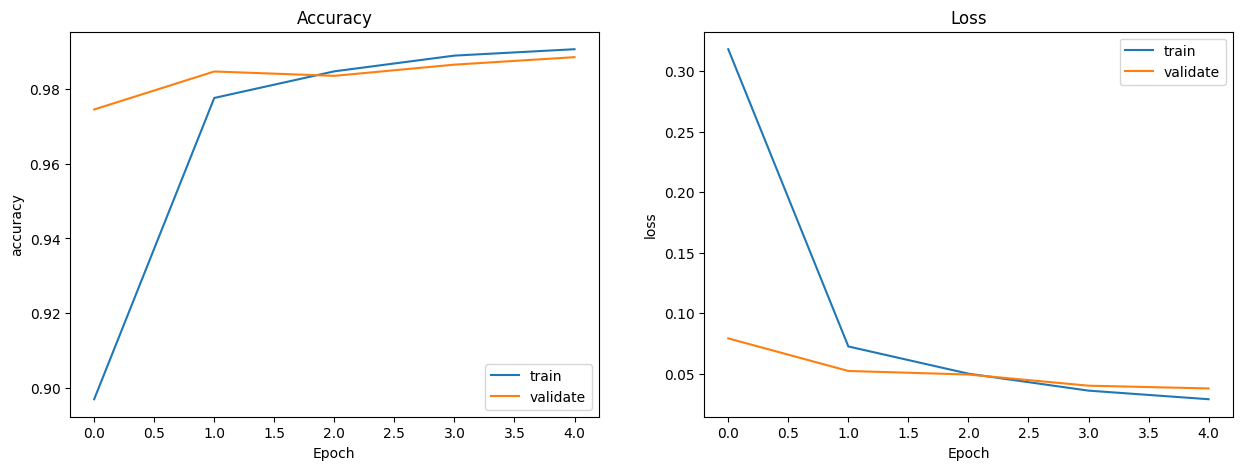

In [67]:
plot_model_history(simple_vgg)

In [68]:
score = simple_vgg.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 99.06%


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model_vgg16 = VGG16(weights='imagenet')

model_vgg16.summary()

# References

- http://yann.lecun.com/exdb/mnist/
- http://yann.lecun.com/exdb/lenet/
- http://neuralnetworksanddeeplearning.com/chap6.html#introducing_convolutional_networks
